# Assignment 

* Assignment to implement learnings so far
* Create a program at least about 150 lines of code

#### Obtain a dataset and create a program where you *implement* the learnings from these first two weeks 

- The program should emply **user input**, **classes**, and **data visualisation**.
- (Original data source: https://catalog.data.gov/dataset/conditions-contributing-to-deaths-involving-coronavirus-disease-2019-covid-19-by-age-group)

In [1]:
import pandas as pd
# Read in the data from the csv file
df = pd.read_csv('dataset_HA.csv')
df_original = df.copy()

In [2]:
#Check for missing values
df.isnull().sum()


Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       172569
Number of Mentions    166979
Flag                  411171
dtype: int64

In [3]:
# Check the columns and data types and how many rows and columns are in the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583740 entries, 0 to 583739
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          583740 non-null  object 
 1   Start Date          583740 non-null  object 
 2   End Date            583740 non-null  object 
 3   Group               583740 non-null  object 
 4   Year                571320 non-null  float64
 5   Month               521640 non-null  float64
 6   State               583740 non-null  object 
 7   Condition Group     583740 non-null  object 
 8   Condition           583740 non-null  object 
 9   ICD10_codes         583740 non-null  object 
 10  Age Group           583740 non-null  object 
 11  COVID-19 Deaths     411171 non-null  float64
 12  Number of Mentions  416761 non-null  float64
 13  Flag                172569 non-null  object 
dtypes: float64(4), object(10)
memory usage: 62.4+ MB


In [4]:
# Show the unique values in the group column
df['Group'].unique()

array(['By Total', 'By Year', 'By Month'], dtype=object)

### - Data cleaning steps
- Only keeping rows in a specific date range
- Removing rows where the age group is not specified
- Remove rows where with 'United States' as a state since that is not valid

### More data cleaning and dealing with missing values

- We can see that the data is grouped either by total, by year, or by month
    - We will remove the rows grouped by year or by month as we will only be interested in the total
- The age ranges will be replaced with a value from 1-8
- Create new column called broad condition group, which groups the conditions by the 2 main ones and a 'other' group, with number values assigned
- Delete unecessary columns

- #### <ins>We also get this message in some rows regarding the number of deaths:<ins>
    - "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards"
    - Therefore rows containing this have been removed to maintain the integrity of the data

In [5]:
# Restrict  dataset to rows between 01/01/2020 and  06/24/2023
df = df[(df['Start Date'] >= '01/01/2020') & (df['End Date'] <= '06/24/2023')]

# Remove rows where the Age Group field is not specified
df = df.dropna(subset=['Age Group'])
df = df[~df['Age Group'].isin(['Not stated', 'All Ages'])]

# Remove rows with 'United States' as the state
df = df[~df['State'].isin(['United States'])]

# Delete rows where Group field is 'By Year' or 'By Month'
df = df[~df['Group'].isin(['By Year', 'By Month'])]

# Dictionary to map age groups to numerical values
age_group_mapping = {
    '0-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65-74': 6,
    '75-84': 7,
    '85+': 8
}
# Use the map method to modify the 'Age Group' column
df['Age Group'] = df['Age Group'].map(age_group_mapping)
# Dictionary to map specific condition groups to broad categories
condition_mapping = {
    'Respiratory diseases': 1,
    'Circulatory diseases': 2,
    'Sepsis': 0,
    'Diabetes': 0,
    'Obesity': 0,
    'Alzheimer disease': 0,
    'Vascular and unspecified dementia': 0,
    'Renal failure': 0,
    'Intentional and unintentional injury, poisoning, and other adverse events': 0,
    'Malignant neoplasms': 0,
    'All other conditions and causes (residual)': 0,
    'COVID-19': 0
}
# Use the map method to create the 'Broad Condition Group' column
df['Broad Condition Group'] = df['Condition Group'].map(condition_mapping)

# Delete unneccessary columns, and those with too many missing values such as Year and Month 
columns_to_delete = [
    'ICD10_codes',
    'Year',
    'Month',
    'Start Date',
    'End Date',
    'Data As Of',
    'Group',
    'Flag'
]
df = df.drop(columns=columns_to_delete)

# Remove rows where the Covid 19 deaths is null
df = df.dropna(subset=['COVID-19 Deaths'])

# Create new csv file with cleaned data
df.to_csv('dataset_HA_clean.csv', index=False)


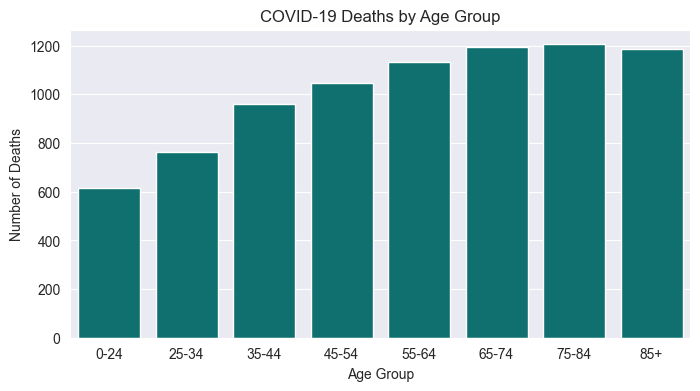

In [6]:
# Explore COVID-19 deaths distribution by age group
import matplotlib.pyplot as plt
import seaborn as sns

reverse_age_group_mapping = {v: k for k, v in age_group_mapping.items()}
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
sns.countplot(x='Age Group', data=df, color='teal')
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(ticks=range(8), labels=[reverse_age_group_mapping[x] for x in age_group_mapping.values()])

plt.show()




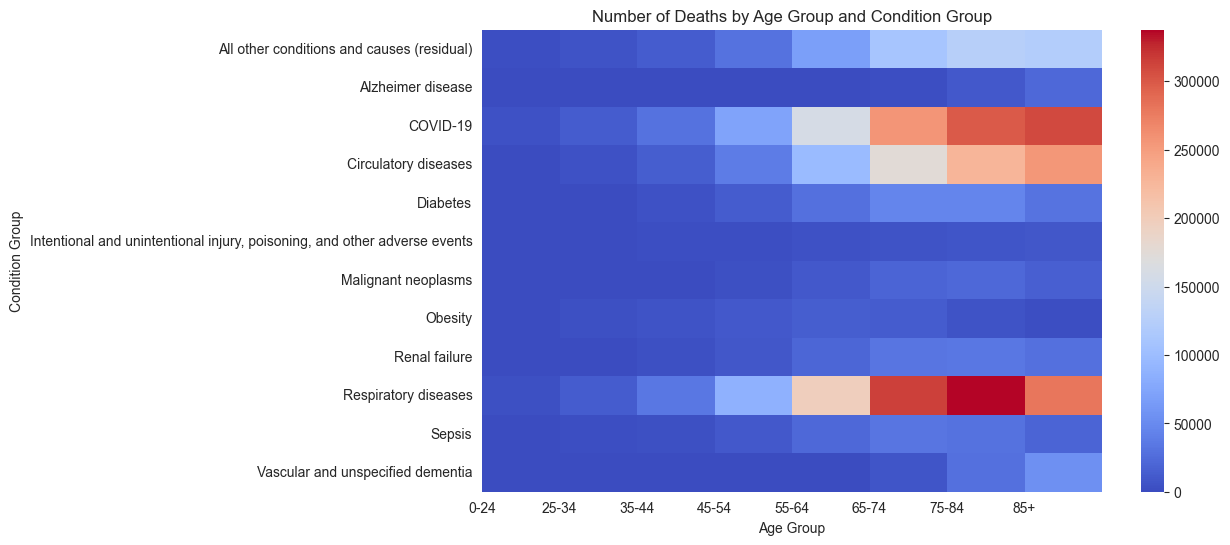

In [11]:
# Heatmap of number of deaths by age group and condition group
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap plot of number of deaths by age group and condition group
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby([ 'Condition Group','Age Group'])['COVID-19 Deaths'].sum().unstack(), cmap='coolwarm')
plt.title('Number of Deaths by Age Group and Condition Group')
plt.xlabel('Age Group')
plt.ylabel('Condition Group')
plt.xticks(ticks=range(8), labels=[reverse_age_group_mapping[x] for x in age_group_mapping.values()])


plt.show()

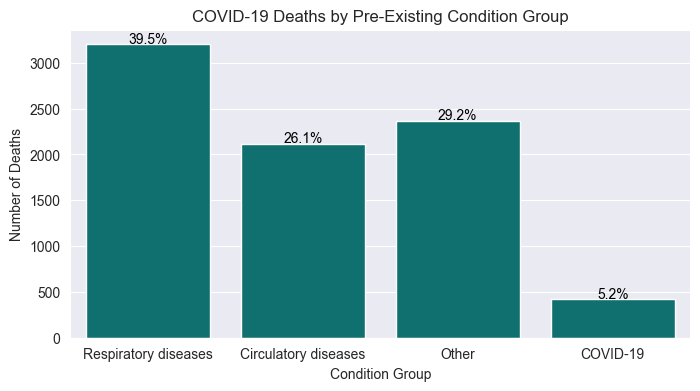

In [19]:
# show deaths with comorbidities vs deaths without comorbidities
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to map specific condition groups to broad categories
temp_mapping = {
    'Respiratory diseases': 1,
    'Circulatory diseases': 2,
    'Sepsis': 0,
    'Diabetes': 0,
    'Obesity': 0,
    'Alzheimer disease': 0,
    'Vascular and unspecified dementia': 0,
    'Renal failure': 0,
    'Intentional and unintentional injury, poisoning, and other adverse events': 0,
    'Malignant neoplasms': 0,
    'All other conditions and causes (residual)': 0,
    'COVID-19': 3
}
# Use the map method to create the 'Broad Condition Group' column
df_temp = df.copy()
df_temp['Broad Condition Group'] = df['Condition Group'].map(temp_mapping)

# Compare deaths from Respiratory diseases, Circulatory diseases, Other, and COVID-19
plt.figure(figsize=(8, 4))
sns.countplot(x='Broad Condition Group', data=df_temp, color='teal')
plt.title('COVID-19 Deaths by Pre-Existing Condition Group')
plt.xlabel('Condition Group')
plt.ylabel('Number of Deaths')
plt.xticks(ticks=range(4), labels=['Respiratory diseases', 'Circulatory diseases', 'Other', 'COVID-19'])

# Also express a percentage of the total on each bar
total = len(df_temp)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 10, f'{height / total:.1%}', ha='center', color='black')
    

plt.show()



C:\Users\marno\AppData\Local\Temp\ipykernel_38412\1409150969.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='COVID-19 Deaths', hue='Broad Condition Group', data=df, ci=None)


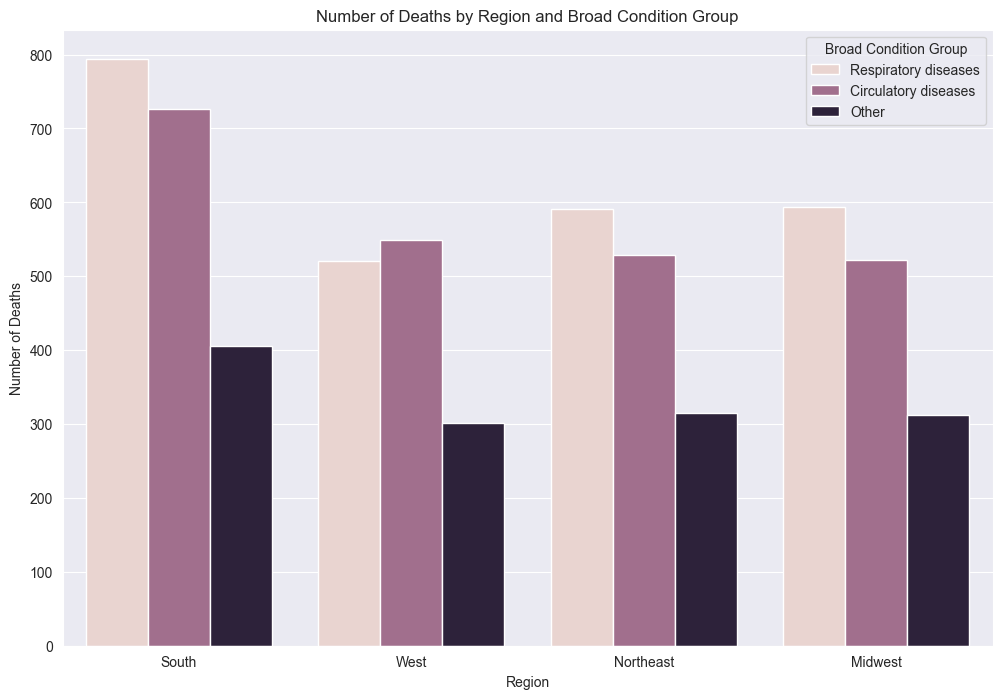

In [20]:
# Categorize each state by region and add a new column to the dataframe
region_mapping = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}
# Mapping of numeric labels to strings for the Broad Condition Group
condition_group_mapping = {
    0: 'Respiratory diseases',
    1: 'Circulatory diseases',
    2: 'Other'
}
# Create a new column called 'Region' and map the states to their region
df['Region'] = df['State'].map({state: region for region, states in region_mapping.items() for state in states})

# Bar plot number of deaths by region by broad condition group
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='COVID-19 Deaths', hue='Broad Condition Group', data=df, ci=None)
plt.title('Number of Deaths by Region and Broad Condition Group')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')

# Assign the representation of the numeric labels to strings
plt.legend(title='Broad Condition Group', labels=[condition_group_mapping[x] for x in condition_group_mapping.keys()])


plt.show()
